In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()

import numpy as np
import scipy.optimize as op
import math as math



In [4]:
f = open('ex2data2.txt', 'r')
data = np.loadtxt(f, delimiter=',')
X = data[:, [0, 1]]
y = data[:, [2]]
y = y.flatten()

import pylab as pl
#pl.scatter(X[:, 0], X[:, 1], c = y, cmap='RdYlBu')


# map_features takes 2 features and combines them a number of degrees increasing the dimensionality allowing
# for more non-linear decision boundries
def map_features(x1, x2):
    '''
    Maps the two input features to quadratic features.|
    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    Inputs X1, X2 must be the same size
    '''
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    return out

mappedX = map_features(X[:, 0], X[:, 1])

# The raw result of the logistic regression. Returns a real value between 0 and 1
def hypothesis(theta, X):
    # Sigmoid function
    return (1 / (1 + math.e**( -1 * ( np.dot(X, theta) ) )))

# theta is a n dimensional vector where n is the number of features in mappedX
theta =  np.zeros([np.shape(mappedX)[1], 1])

# Regularized cost function for logistic regression
def costFunction(theta, X, y, lamda):
    #hypoth = hypothesis(theta, X)
    #m = X.shape[0] * 1.0
    
    m = len(y) * 1.0
    hypoth = hypothesis(theta, X)
           
    rawCost =(1/m) * ((-y * np.log(hypoth)) - ((-y + 1) * np.log(-hypoth + 1))).sum() 
    regularizationTerm = sum((theta ** 2)[1:]) * float(lamda) / (2 * m) 
    
    cost = rawCost + regularizationTerm
    return cost

# Regularized gradient function for logistic regression
def gradient(theta, X, y, lamda):
        
    gradientDerivitive = (((hypothesis(theta, X)) - y).dot(X)) * (1 / X.shape[0])
    regularizationDerivitive = (lamda / X.shape[0]) * theta
        
    gradient = gradientDerivitive.T + regularizationDerivitive
    gradient[0] -= regularizationDerivitive[0]

    # Flattern ensures that the return value is a 1-d numpy array. aka a vector 
    return gradient.flatten()

def plotDecisionBoundary(theta, X, y):
    
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
        
    z = np.zeros([u.shape[0], u.shape[0]])
    
    for uIndex, uVal in enumerate(u):
        for vIndex, vVal in enumerate(v):
            z[uIndex, vIndex] = map_features(np.array([uVal]), np.array([vVal])).dot(theta)
          
                
    # Add the data points to the plot
    pl.scatter(X[:, 1], X[:, 2], c = y, cmap='RdYlBu')
    
    # Add the decision boundry
    plt.contour(u, v, z.T, [0], colors='dodgerblue')
    
    # Add decorations to the graph
    plt.title('Decision boundary for lambda = ' + str(lamda), fontsize=13)
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(('y=1', 'y=0'), loc='upper right', numpoints=1)
    plt.xticks(np.arange(-.8, 1.3, .2))
    plt.yticks(np.arange(-.8, 1.3, .2))
    plt.axis([-.8, 1.2, -.8, 1.2])

# Returns the classification prediction for the learnt model. Returns binary value of 0 or 1
def predict(X):
    return np.rint(hypothesis(optimal_theta, X))

# Gets predictions of learnt model on entire training data set and compares to label vector (y) for success rate
def trainingSetPerformance():
    results = predict(mappedX)
    differences = np.absolute((y - results))
    return 1 - (differences.sum() / y.size)
    


Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
Training Set Performace:  83.0508474576


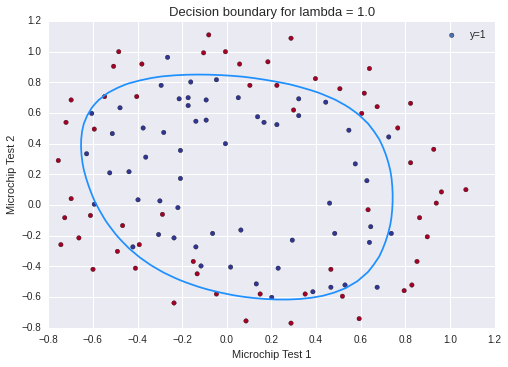

In [11]:
m, n = mappedX.shape
initial_theta = np.zeros(n)
lamda = 1.0 # Regularization Parameter

myargs = (mappedX, y, lamda)
opts = {'full_output': True, 'maxiter': 600}

optimal_theta, cost, grad_at_min, inv_hessian_matrix,\
fun_calls, grad_calls, warn_flags = op.optimize.fmin_bfgs(costFunction,
                                initial_theta,
                                args=myargs,
                                fprime=gradient,
                                **opts)

plotDecisionBoundary(optimal_theta, mappedX, y)

print("Training Set Performace: ", trainingSetPerformance()*100)




    

